In [1]:
import numpy as np
from scipy.stats import norm
import scipy.integrate as integrate
import matplotlib.pyplot as plt

In [2]:
% matplotlib inline

In [3]:
class rejection_sampling:
    def __init__(self, propose_mean, propose_var, mean_one, mean_two, var_one, var_two, mix_one, mix_two):
        # parameters of propose distribution
        self.propose_mean = propose_mean
        self.propose_var = propose_var
        # parameters of target distribution
        self.mean_one = mean_one
        self.var_one = var_one
        self.mean_two = mean_two
        self.var_two = var_two
        self.mix_one = mix_one
        self.mix_two = mix_two
        # result samples
        self.sample_lst = []
        
    def check_tilde_p(self, Z, k, x_axis):
        # parameters of tilde distribution
        self.Z = Z
        # parameters of envolope
        self.k = k
        # example of propose distribution
        propose_distribution = norm.pdf(x_axis, self.propose_mean, self.propose_var)
        envolope_distribution = self.k* propose_distribution
        gaussian_one = norm.pdf(x_axis, self.mean_one, self.var_one)
        gaussian_two = norm.pdf(x_axis, self.mean_two, self.var_two)
        target_distribution = mix_one* gaussian_one + mix_two* gaussian_two
        given_distribution = Z* target_distribution
        
        plt.figure(figsize=(8,8))
        plt.plot(x_axis, propose_distribution, "--", label = "propose distribution q", c = "blue")
        plt.plot(x_axis, target_distribution, "--", label = "target distribution p", c = "orange")
        plt.plot(x_axis, given_distribution, label = "given distribution p_tilde", c = "orange")
        plt.plot(x_axis, envolope_distribution, label = "envolope distribution k*q", c = "blue")
        plt.xlabel("x")
        plt.ylabel("prob density")
        plt.legend()
        
        # make srue k*q >= f_tilde for all x
        assert(sum(envolope_distribution < given_distribution) == 0)
        
    def fit(self, num_samples):
        while (len(self.sample_lst) < num_samples):
            # generate a sample from propose distribution (assumed to be gaussian)
            sample_x = np.random.normal(loc= propose_mean, scale= propose_var, size= 1)
            # obtain the value of k*p(x)
            envolope_prob_density = self.k* norm.pdf(sample_x, self.propose_mean, self.propose_var)
            # sample from Uniform distribution of [0, k*p(x)]
            sample_u = np.random.uniform(low= 0, high= envolope_prob_density)
            # rejection-accecptance
            tilde_prob_density= self.Z* (self.mix_one* norm.pdf(sample_x, self.mean_one, self.var_one)
                                     + self.mix_two* norm.pdf(sample_x, self.mean_two, self.var_two))
            if sample_u <= tilde_prob_density:
                # accept
                self.sample_lst += [sample_x[0]]
        sample_array = np.array(self.sample_lst)
        return sample_array

In [4]:
mean_one = -5
var_one = 0.5
mean_two = 3
var_two = 0.5

mix_one = 0.5
mix_two = 1 - mix_one

propose_mean = 0
propose_var = 3.5

rj_sample = rejection_sampling(propose_mean, propose_var, mean_one, mean_two, var_one, var_two, mix_one, mix_two)

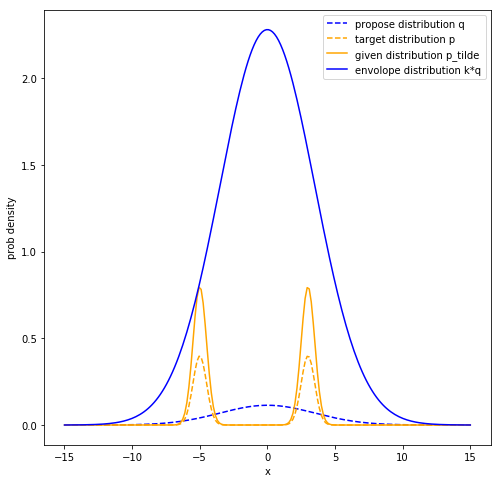

In [5]:
x_axis = np.linspace(-15, 15, 200)
rj_sample.check_tilde_p(k= 20, Z= 2, x_axis= x_axis)

In [6]:
num_samples = 1000
sample_result = rj_sample.fit(num_samples)

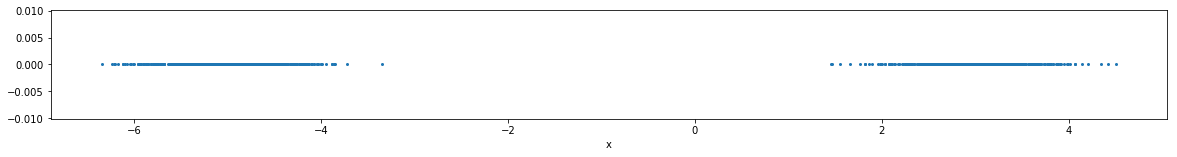

In [7]:
plt.figure(figsize= (20,2))
plt.xlabel("x")
plt.scatter(sample_result, np.zeros(num_samples), s = 4)

In [8]:
from sklearn.mixture import GaussianMixture

In [9]:
gaussian_mixture = GaussianMixture(n_components= 2)

In [10]:
gaussian_mixture.fit(sample_result.reshape(-1, 1))

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=2, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [11]:
print "sampled mean"
print gaussian_mixture.means_
print "sampled variance"
print gaussian_mixture.covariances_

sampled mean
[[-4.99840989]
 [ 2.99894841]]
sampled variance
[[[0.25249156]]

 [[0.24343677]]]
